# Importando as bibliotecas e carregamento dos dados


In [ ]:
import pandas as pd
import numpy as sn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [ ]:
df = pd.read_csv('/content/dados_tratados.csv')

In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# Iniciando transformação

-Remoção de Colunas Irrelevantes


In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# Encoding

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df = df_encoded.copy()

In [ ]:
display(df.head())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7267 non-null   int64  
 1   tenure                                 7267 non-null   int64  
 2   Charges.Monthly                        7267 non-null   float64
 3   Charges.Total                          7256 non-null   float64
 4   Churn_Yes                              7267 non-null   bool   
 5   gender_Male                            7267 non-null   bool   
 6   Partner_Yes                            7267 non-null   bool   
 7   Dependents_Yes                         7267 non-null   bool   
 8   PhoneService_Yes                       7267 non-null   bool   
 9   MultipleLines_No phone service         7267 non-null   bool   
 10  MultipleLines_Yes                      7267 non-null   bool   
 11  Inte

None

# Verificação da Proporção de Evasão

In [ ]:
churn_proportions = df['Churn_Yes'].value_counts(normalize=True)
print("Proporção de Clientes que Evadiram (Churn_Yes=True) vs. Ativos (Churn_Yes=False):")
print(churn_proportions)

if churn_proportions.loc[True] > 0.3 or churn_proportions.loc[False] > 0.7:
    print("\nObserva-se um desequilíbrio significativo entre as classes. A proporção de clientes que evadiram é menor do que a de clientes ativos, o que pode impactar o treinamento de modelos preditivos.")
else:
    print("\nAs classes parecem estar relativamente equilibradas.")

Proporção de Clientes que Evadiram (Churn_Yes=True) vs. Ativos (Churn_Yes=False):
Churn_Yes
False    0.74281
True     0.25719
Name: proportion, dtype: float64

Observa-se um desequilíbrio significativo entre as classes. A proporção de clientes que evadiram é menor do que a de clientes ativos, o que pode impactar o treinamento de modelos preditivos.


# Balanceamento de Classes

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Separar features (X) e target (y)
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Handle missing values in X before applying SMOTE
# In this case, 'Charges.Total' has NaNs, filling with the mean.
if X['Charges.Total'].isnull().any():
    X['Charges.Total'] = X['Charges.Total'].fillna(X['Charges.Total'].mean())

print(f"Distribuição da classe antes do balanceamento: {Counter(y)}")

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Distribuição da classe após SMOTE: {Counter(y_resampled)}")

# Agora, X_resampled e y_resampled contêm o dataset balanceado
# Você pode criar um novo DataFrame se desejar:
# df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn_Yes'])], axis=1)

Distribuição da classe antes do balanceamento: Counter({False: 5398, True: 1869})
Distribuição da classe após SMOTE: Counter({False: 5398, True: 5398})


# Padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identificar as colunas numéricas para padronização
# Excluímos colunas booleanas e colunas que já são resultados de one-hot encoding
numeric_cols = X_resampled.select_dtypes(include=['int64', 'float64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar padronização apenas às colunas numéricas
X_resampled[numeric_cols] = scaler.fit_transform(X_resampled[numeric_cols])

print("Dataset X_resampled após padronização das colunas numéricas:")
display(X_resampled.head())

Dataset X_resampled após padronização das colunas numéricas:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.395611,-0.775273,-0.087416,-0.665026,False,True,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
1,-0.395611,-0.775273,-0.286034,-0.688322,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,-0.395611,-0.984063,0.201799,-0.808032,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,2.527738,-0.608241,1.041569,-0.370021,True,True,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,2.527738,-1.025821,0.550251,-0.814188,False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True


# Análise de Correlação


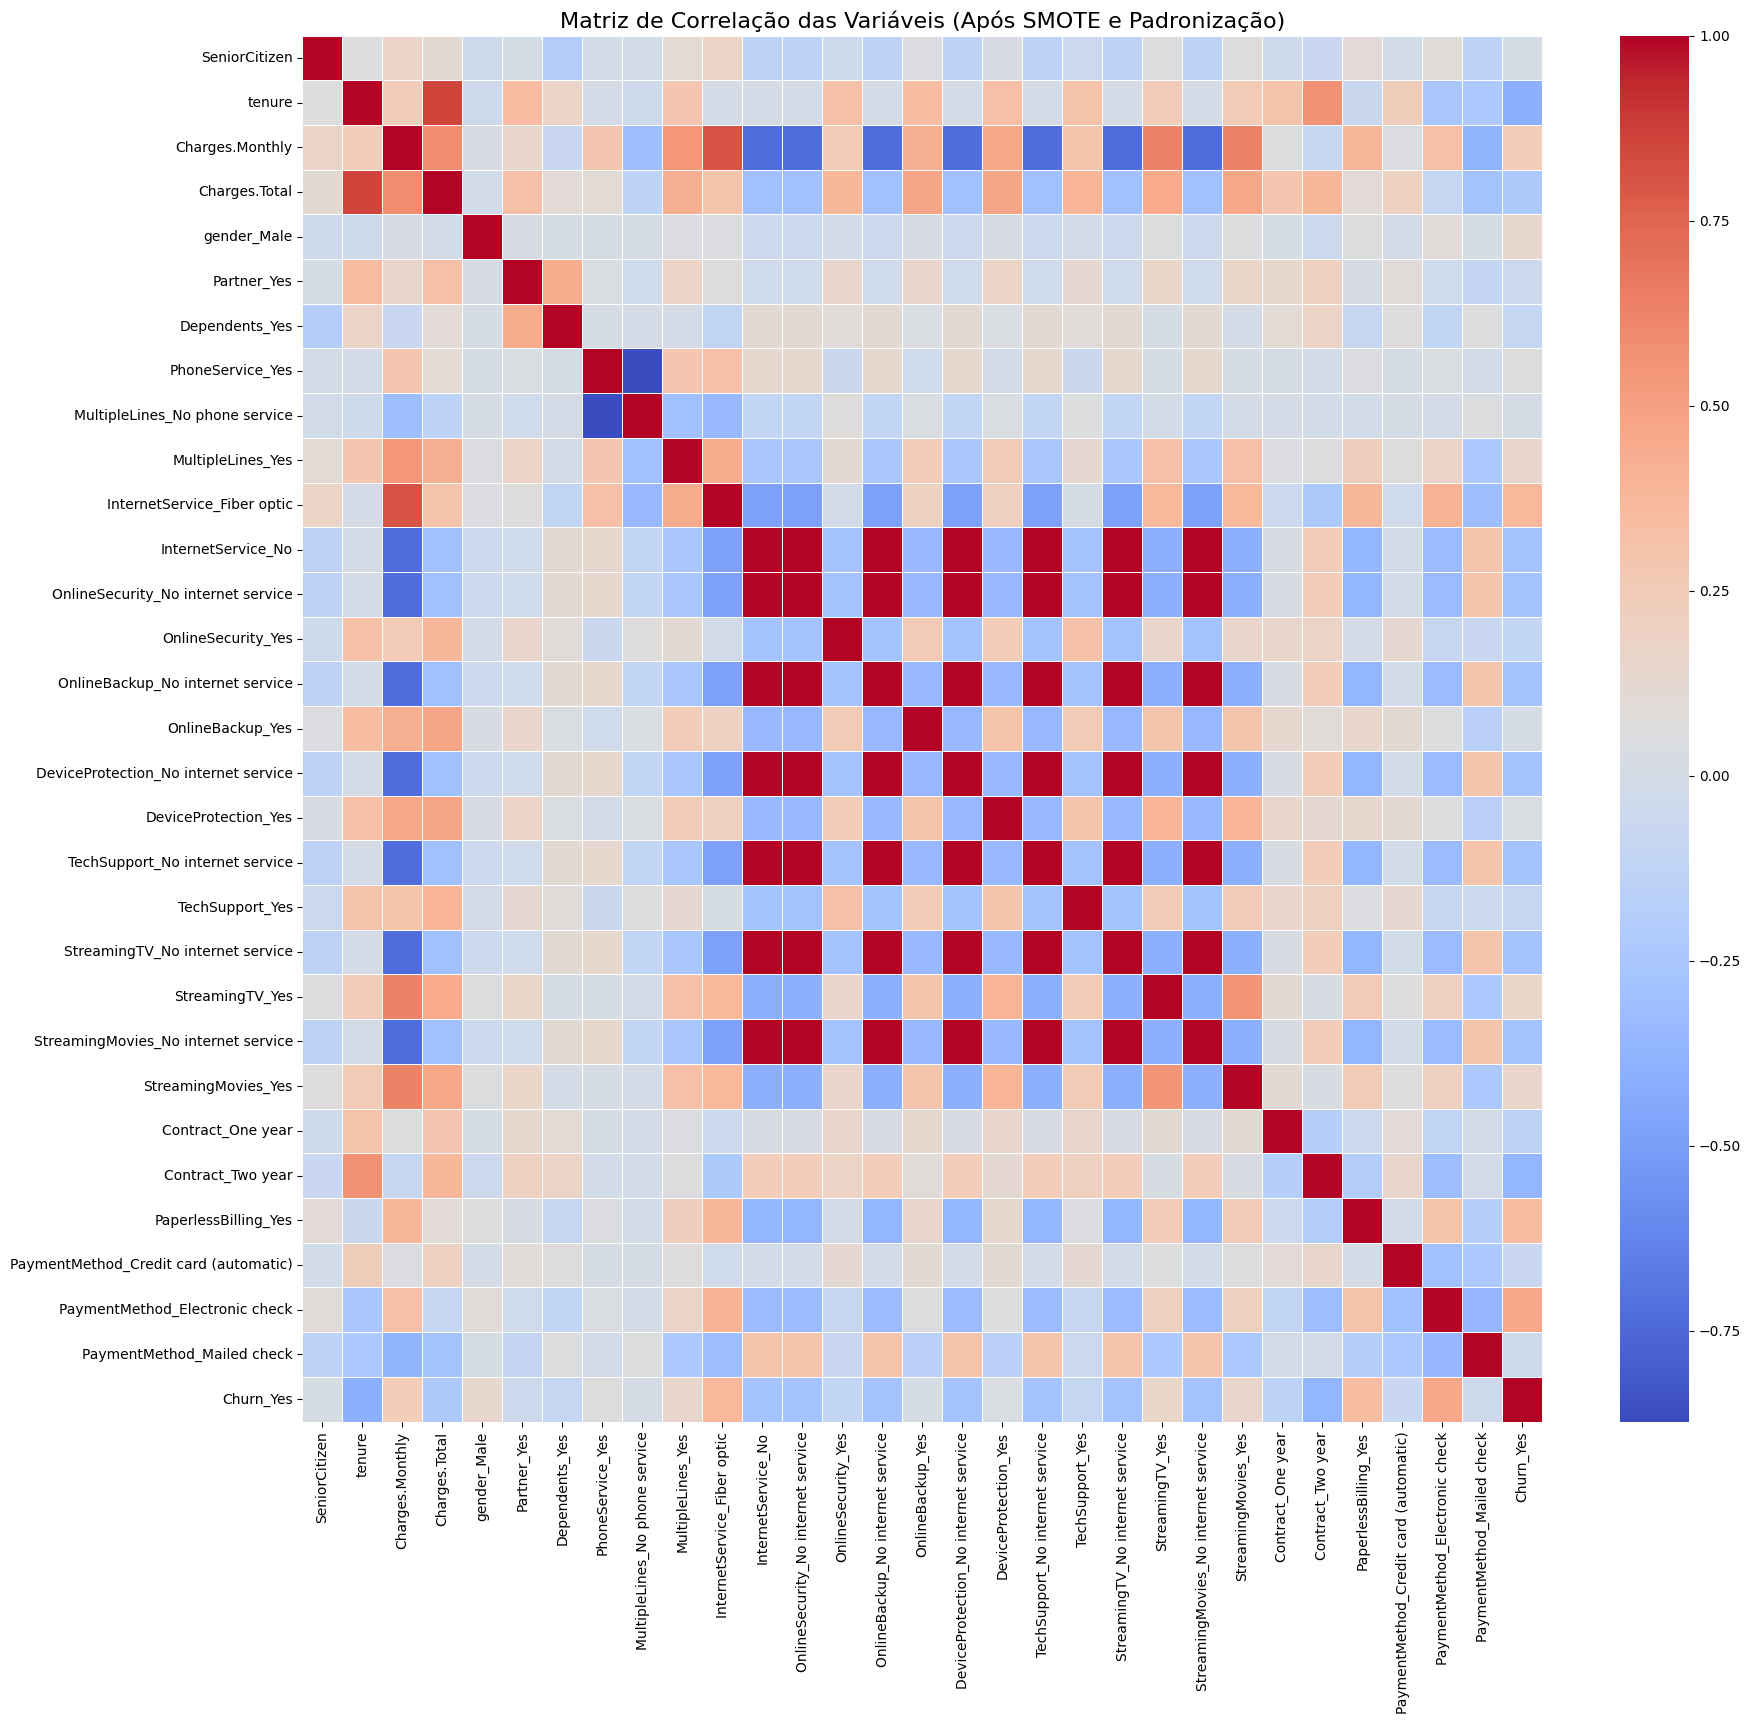


Correlações com 'Churn_Yes':


,Churn_Yes
Churn_Yes,1.000000
PaymentMethod_Electronic check,0.459110
InternetService_Fiber optic,0.375181
PaperlessBilling_Yes,0.342103
Charges.Monthly,0.235361
StreamingTV_Yes,0.164659
StreamingMovies_Yes,0.156463
MultipleLines_Yes,0.146984
gender_Male,0.141621
PhoneService_Yes,0.069420


In [ ]:
# Combinar X_resampled e y_resampled para calcular a matriz de correlação completa
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Calcular a matriz de correlação
correlation_matrix = df_resampled.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis (Após SMOTE e Padronização)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Exibir correlações com a variável 'Churn_Yes'
print("\nCorrelações com 'Churn_Yes':")
display(correlation_matrix['Churn_Yes'].sort_values(ascending=False))

# Análises Direcionadas

/tmp/ipython-input-76511002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Yes', y='tenure', data=df_resampled, palette='viridis')


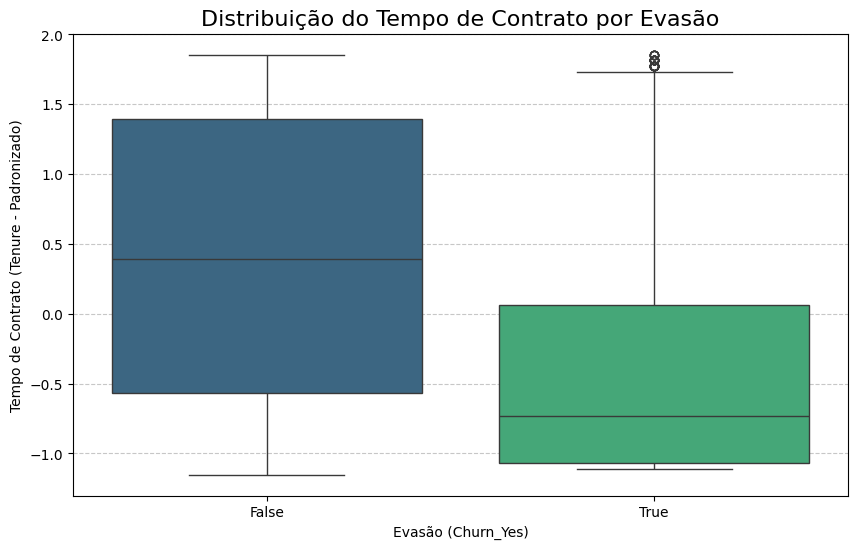

/tmp/ipython-input-76511002.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Yes', y='Charges.Total', data=df_resampled, palette='magma')


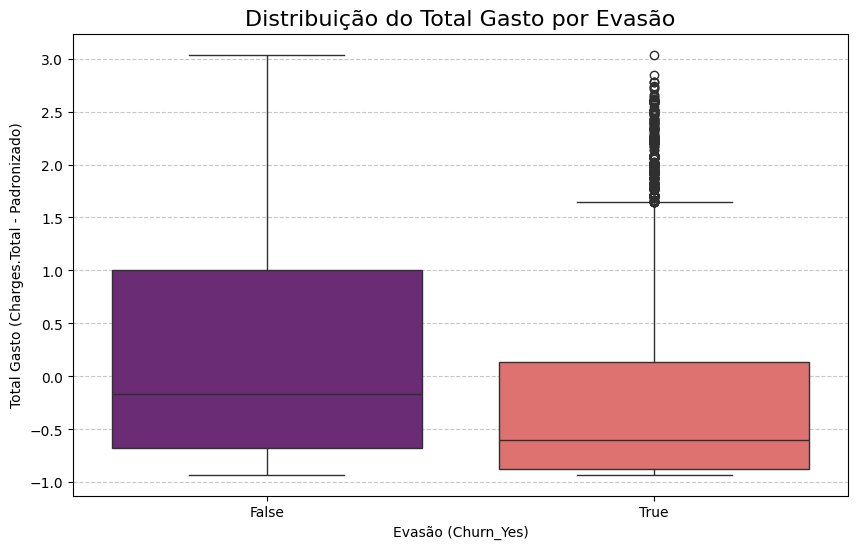

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para Tempo de Contrato (Tenure) vs. Evasão (Churn_Yes)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Yes', y='tenure', data=df_resampled, palette='viridis')
plt.title('Distribuição do Tempo de Contrato por Evasão', fontsize=16)
plt.xlabel('Evasão (Churn_Yes)')
plt.ylabel('Tempo de Contrato (Tenure - Padronizado)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot para Total Gasto (Charges.Total) vs. Evasão (Churn_Yes)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Yes', y='Charges.Total', data=df_resampled, palette='magma')
plt.title('Distribuição do Total Gasto por Evasão', fontsize=16)
plt.xlabel('Evasão (Churn_Yes)')
plt.ylabel('Total Gasto (Charges.Total - Padronizado)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Separação de Dados

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Distribuição da classe no treino: {Counter(y_train)}")
print(f"Distribuição da classe no teste: {Counter(y_test)}")

Tamanho do conjunto de treino (X_train): (8636, 30)
Tamanho do conjunto de teste (X_test): (2160, 30)
Distribuição da classe no treino: Counter({False: 4318, True: 4318})
Distribuição da classe no teste: Counter({True: 1080, False: 1080})


# Criação de Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time

print("### 1. Modelo: Regressão Logística ###")
print("Justificativa: A Regressão Logística é um modelo linear que estima a probabilidade de uma ocorrência (evasão, neste caso) através de uma função sigmoide. Modelos lineares, por utilizarem algoritmos de otimização baseados em gradiente, são sensíveis à escala das features. Features com escalas muito diferentes podem fazer com que o algoritmo de otimização convirja mais lentamente ou tenha dificuldade em encontrar o mínimo global. Por isso, a padronização prévia dos dados (feita com StandardScaler) é crucial para o bom desempenho da Regressão Logística, garantindo que todas as features contribuam igualmente para a distância calculada pelo algoritmo.")

# Inicializar e treinar o modelo de Regressão Logística
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' é bom para datasets pequenos e l1/l2 penalidades
start_time = time.time()
log_reg_model.fit(X_train, y_train)
end_time = time.time()
print(f"Tempo de treinamento da Regressão Logística: {end_time - start_time:.4f} segundos")

# Previsões no conjunto de teste
y_pred_log_reg = log_reg_model.predict(X_test)
y_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (Churn_Yes=True)

print("\n### Métricas da Regressão Logística ###")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_log_reg):.4f}")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log_reg))

print("\n" + "-"*50 + "\n")

print("### 2. Modelo: Random Forest Classifier ###")
print("Justificativa: Random Forest é um algoritmo de aprendizado de máquina baseado em árvores de decisão. Ao contrário dos modelos lineares, os modelos baseados em árvores (como Decision Tree, Random Forest e XGBoost) não são sensíveis à escala das features. Isso ocorre porque suas decisões são baseadas em testes de desigualdade (ex: 'feature A > valor X'). A ordem relativa dos valores das features é o que importa, e não seus valores absolutos. Portanto, padronizar ou normalizar os dados não afeta a forma como as árvores são construídas ou suas previsões. Isso torna o Random Forest uma excelente escolha para dados sem escala ou para comparar o impacto da padronização.")

# Inicializar e treinar o modelo Random Forest
# Usar n_estimators=100 (default) é um bom ponto de partida
random_forest_model = RandomForestClassifier(random_state=42)
start_time = time.time()
random_forest_model.fit(X_train, y_train)
end_time = time.time()
print(f"Tempo de treinamento do Random Forest: {end_time - start_time:.4f} segundos")

# Previsões no conjunto de teste
y_pred_rf = random_forest_model.predict(X_test)
y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (Churn_Yes=True)

print("\n### Métricas do Random Forest Classifier ###")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

### 1. Modelo: Regressão Logística ###
Justificativa: A Regressão Logística é um modelo linear que estima a probabilidade de uma ocorrência (evasão, neste caso) através de uma função sigmoide. Modelos lineares, por utilizarem algoritmos de otimização baseados em gradiente, são sensíveis à escala das features. Features com escalas muito diferentes podem fazer com que o algoritmo de otimização convirja mais lentamente ou tenha dificuldade em encontrar o mínimo global. Por isso, a padronização prévia dos dados (feita com StandardScaler) é crucial para o bom desempenho da Regressão Logística, garantindo que todas as features contribuam igualmente para a distância calculada pelo algoritmo.
Tempo de treinamento da Regressão Logística: 0.0885 segundos

### Métricas da Regressão Logística ###
Acurácia: 0.8245
Precisão: 0.8143
Recall: 0.8407
F1-Score: 0.8273
ROC AUC Score: 0.9126
Matriz de Confusão:
 [[873 207]
 [172 908]]

--------------------------------------------------

### 2. Modelo: Rand

# Análise de Importância das Variáveis

#### 1. Importância das Features para Regressão Logística ####
Top 10 Features (Regressão Logística - Coeficientes Absolutos):



,0
Charges.Monthly,5.689916
InternetService_Fiber optic,5.671333
PhoneService_Yes,4.147451
StreamingTV_Yes,2.108758
StreamingMovies_Yes,2.061922
tenure,2.010650
MultipleLines_Yes,1.368418
PaymentMethod_Electronic check,1.257320
Charges.Total,1.113277
DeviceProtection_Yes,0.984280


/tmp/ipython-input-3324080986.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_lr_features.values, y=top_10_lr_features.index, palette='viridis')


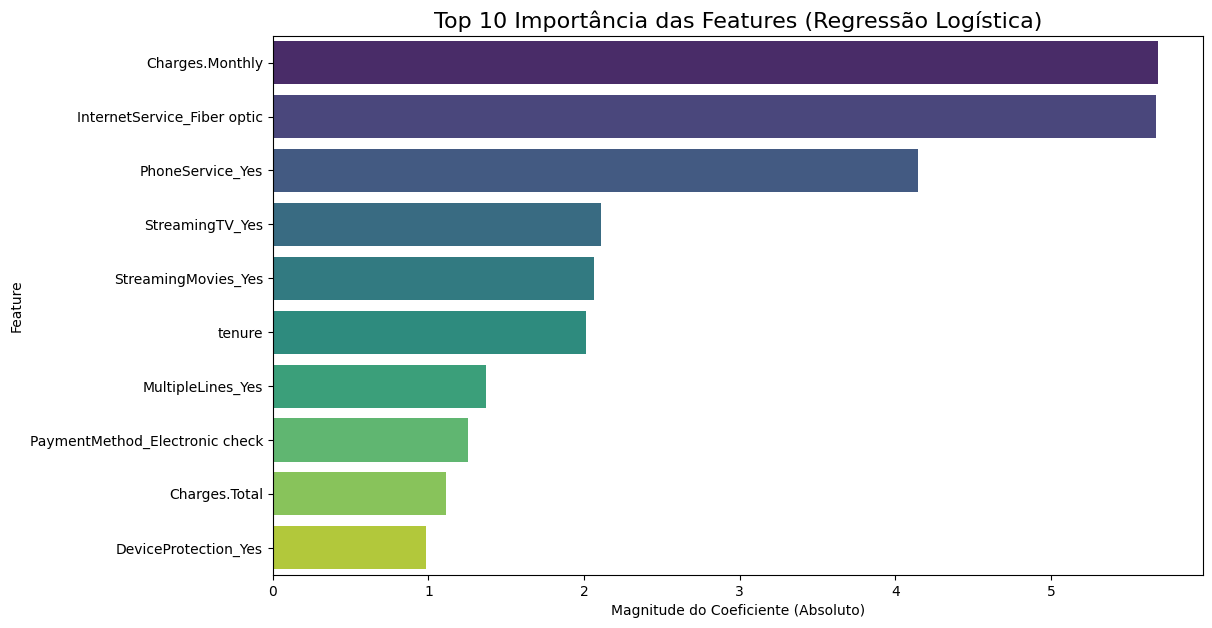


--------------------------------------------------

#### 2. Importância das Features para Random Forest Classifier ####
Top 10 Features (Random Forest):



,0
Charges.Total,0.170047
tenure,0.159858
Charges.Monthly,0.136745
PaymentMethod_Electronic check,0.102626
InternetService_Fiber optic,0.048791
PaperlessBilling_Yes,0.038663
Contract_Two year,0.035197
MultipleLines_Yes,0.022863
gender_Male,0.022220
Contract_One year,0.020123


/tmp/ipython-input-3324080986.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_rf_features.values, y=top_10_rf_features.index, palette='magma')


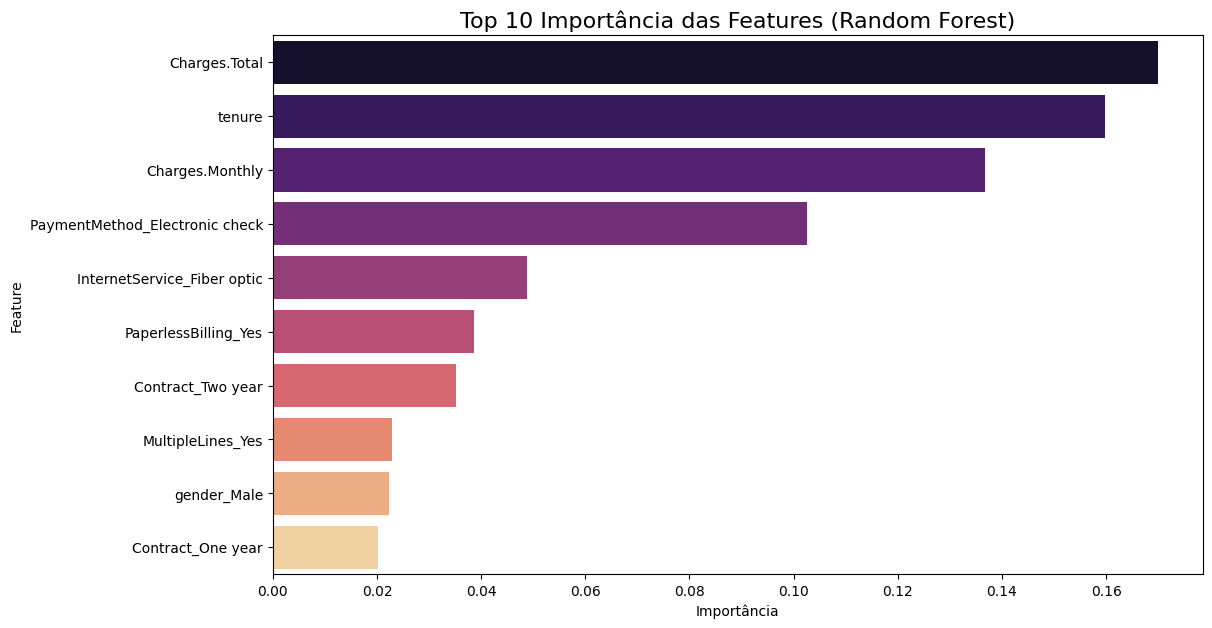

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("#### 1. Importância das Features para Regressão Logística ####")
# Coeficientes da Regressão Logística
log_reg_feature_importance = pd.Series(log_reg_model.coef_[0], index=X_train.columns)

# Exibir as 10 features mais importantes (maior valor absoluto do coeficiente)
top_10_lr_features = log_reg_feature_importance.abs().sort_values(ascending=False).head(10)
print("Top 10 Features (Regressão Logística - Coeficientes Absolutos):\n")
display(top_10_lr_features)

# Visualizar a importância das features para Regressão Logística
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_lr_features.values, y=top_10_lr_features.index, palette='viridis')
plt.title('Top 10 Importância das Features (Regressão Logística)', fontsize=16)
plt.xlabel('Magnitude do Coeficiente (Absoluto)')
plt.ylabel('Feature')
plt.show()

print("\n" + "-"*50 + "\n")

print("#### 2. Importância das Features para Random Forest Classifier ####")
# Importância das features do Random Forest
rf_feature_importance = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)

# Exibir as 10 features mais importantes
top_10_rf_features = rf_feature_importance.sort_values(ascending=False).head(10)
print("Top 10 Features (Random Forest):\n")
display(top_10_rf_features)

# Visualizar a importância das features para Random Forest
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_rf_features.values, y=top_10_rf_features.index, palette='magma')
plt.title('Top 10 Importância das Features (Random Forest)', fontsize=16)
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- 1. Dummy Classifier (Baseline) ---
# Justificativa: Fornece uma baseline de desempenho para comparar com os modelos reais.
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_model.fit(X_train, y_train)

# --- 2. Decision Tree Classifier ---
# Justificativa: Modelo baseado em árvores, não sensível à escala dos dados.
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# --- 3. K-Nearest Neighbors (KNN) ---
# Justificativa: Modelo baseado em distância, que requer dados padronizados.
# Já temos X_train e X_test padronizados.
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors é um hiperparâmetro comum
knn_model.fit(X_train, y_train)

# --- 4. Support Vector Machine (SVM) ---
# Justificativa: Modelo de fronteira de decisão, que também requer dados padronizados.
# Já temos X_train e X_test padronizados.
svm_model = SVC(random_state=42, probability=True) # probability=True para poder calcular ROC AUC se necessário
svm_model.fit(X_train, y_train)

print(f'Acurácia Dummy: {dummy_model.score(X_test, y_test):.4f}')
print(f'Acurácia Árvore: {decision_tree_model.score(X_test, y_test):.4f}')
print(f'Acurácia KNN: {knn_model.score(X_test, y_test):.4f}')
print(f'Acurácia SVM: {svm_model.score(X_test, y_test):.4f}')
print(f'Acurácia Regressão Logística: {log_reg_model.score(X_test, y_test):.4f}')
print(f'Acurácia Random Forest: {random_forest_model.score(X_test, y_test):.4f}')

Acurácia Dummy: 0.5000
Acurácia Árvore: 0.8056
Acurácia KNN: 0.8153
Acurácia SVM: 0.8375
Acurácia Regressão Logística: 0.8245
Acurácia Random Forest: 0.8523


# Conclusão

##**Resultados**

###Principais fatores que afetam a evasão de clientes

* Tempo de Contrato (tenure): Este é o fator mais significativo. Clientes com
menor tempo de contrato são muito mais propensos a evadir. A lealdade aumenta significativamente quanto mais tempo um cliente permanece.

* Custos Mensais e Totais (Charges.Monthly, Charges.Total): Clientes com mensalidades mais altas ou que acumularam menos gastos totais (frequentemente correlacionado a menor tempo de contrato) são mais suscetíveis à evasão.

* Tipo de Serviço de Internet (InternetService_Fiber optic): Clientes que utilizam serviços de internet por fibra ótica apresentam uma maior propensão à evasão. Isso pode indicar problemas com a qualidade do serviço, suporte ou forte concorrência no segmento de internet de alta velocidade.

* Método de Pagamento (PaymentMethod_Electronic check): Clientes que utilizam cheques eletrônicos como forma de pagamento são mais propensos a evadir. Isso pode indicar insatisfação com o próprio processo de pagamento ou que este segmento de clientes é, em geral, menos leal.

* Tipo de Contrato (Contract_Two year, Contract_One year): Clientes com contratos de menor duração (mês a mês ou de um ano) são mais propensos a evadir em comparação com aqueles com contratos de dois anos. Contratos mais longos naturalmente incentivam a retenção de clientes.

* Serviços Adicionais (OnlineSecurity_Yes, TechSupport_Yes): A ausência de serviços de valor agregado, como segurança online e suporte técnico, está ligada a uma maior taxa de evasão, sugerindo que esses serviços contribuem para a satisfação e lealdade do cliente.


Esses insights são cruciais para o desenvolvimento de estratégias de retenção direcionadas.

<br>

### Algumas das estratégias de retenção para ajudar a reduzir o churn e fortalecer o relacionamento com os clientes está em:

* Foco em Clientes Recém-Chegados: Implementar programas de onboarding e acompanhamento proativo nos primeiros meses de contrato. Oferecer suporte dedicado, tutoriais e garantir que o cliente esteja satisfeito com o serviço. Identificar e resolver problemas rapidamente durante este período crítico.

* Avaliação da Oferta de Fibra Ótica: Realizar uma análise de satisfação e qualidade específica para clientes de fibra ótica. Investigar reclamações comuns, comparar preços e serviços com a concorrência e considerar programas de fidelidade ou pacotes exclusivos para este segmento.

* Otimização de Métodos de Pagamento: Avaliar a experiência do usuário com o método de pagamento por cheque eletrônico. Simplificar o processo, oferecer incentivos para mudar para métodos mais estáveis (como débito automático em cartão de crédito), ou investigar os motivos da insatisfação entre esses usuários.

* Incentivo a Contratos de Longa Duração: Criar ofertas e benefícios atraentes para clientes que optarem por contratos de um ou dois anos, em vez de planos mês a mês. Isso pode incluir descontos progressivos, serviços adicionais gratuitos ou upgrades.

* Promoção de Serviços de Valor Agregado: Destacar e incentivar a adesão a serviços como segurança online e suporte técnico. Mostrar claramente o valor desses serviços na experiência geral do cliente, pois eles contribuem para a fidelização.

* Gerenciamento de Expectativas de Custos: Ser transparente sobre os custos e evitar surpresas na fatura. Considerar pacotes flexíveis ou ofertas personalizadas para clientes com mensalidades mais altas, buscando alinhar o valor percebido ao preço pago.

Essas estratégias visam abordar proativamente os principais pontos de atrito identificados e melhorar a experiência geral do cliente para incentivar a permanência.